<a href="https://colab.research.google.com/github/Hamed-Mohammadi/covid_19_uni_project/blob/main/Classification_Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CoroNet: COVID19 Chest XRays classification model 
By Dr Asif Iqbal Khan


The model uses Xception/InceptionResNetV2/NasNet as base model pre-trained on ImageNet, retrained on Chest X-rays dataset 





In [ ]:
#Download and unzip dataset if reqiored

#!gdown https://link to dataset
#!unzip /content/covid19-radiography-database.zip


Mount Gogle Drive to save and load models n datasets

In [2]:
#Mount Google Drive


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#copy dataset folder from google drive
#!cp -R /content/drive/"My Drive"/Datasets/covid-19 /content


In [3]:
#import libraries and packages

from numpy.random import seed
seed(8) #1

import tensorflow
tensorflow.random.set_seed(7)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

from tensorflow.python.keras import models
from tensorflow.python.keras import layers

from tensorflow.keras import optimizers




In [4]:
print(os.listdir("/content/"))

#Print and remove zips once done



['.config', 'drive', 'sample_data']


In [5]:
ls /content/drive/MyDrive/'Colab Notebooks'/'covid 19'/classification_dataset/four_classes/train

ls: cannot access '/content/drive/MyDrive/Colab Notebooks/covid 19/classification_dataset/four_classes/train': No such file or directory


In [6]:
from os import listdir
#data_list = listdir('/content/covid-19/four_classes/train')
data_list = listdir('/content/drive/MyDrive/Colab_Notebooks/covid_19/data_set/four_classes/train')
data_list

['pneumonia_viral', 'pneumonia_bacterial', 'normal', 'covid']

**Crete Data Generators to preprocess and prepare training and validation**

In [7]:

from os import listdir
#data_list = listdir('/content/covid-19/four_classes/train')
data_list = listdir("/content/drive/MyDrive/Colab_Notebooks/covid_19/data_set/four_classes/train")

#Delete some classes that may interfere

print(len(data_list))


DATASET_PATH  = '/content/drive/MyDrive/Colab_Notebooks/covid_19/data_set/four_classes/train'
test_dir =  '/content/drive/MyDrive/Colab_Notebooks/covid_19/data_set/four_classes/test'
IMAGE_SIZE    = (150, 150)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 80
LEARNING_RATE =0.0001



#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')



# For multiclass use categorical n for binary use binary
train_batches = train_datagen.flow_from_directory(DATASET_PATH, 
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical"
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"
                                                  )



4
Found 1119 images belonging to 4 classes.
Found 277 images belonging to 4 classes.


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


In [8]:
path="/content/covid-19/four_classes/"
!ls -a /content/drive/MyDrive/Colab_Notebooks/covid_19/data_set/four_classes/train/.ipynb_checkpoints
!rm -R /content/drive/MyDrive/Colab_Notebooks/covid_19/data_set/four_classes/test/.ipynb_checkpoints 
!pwd

ls: cannot access '/content/drive/MyDrive/Colab_Notebooks/covid_19/data_set/four_classes/train/.ipynb_checkpoints': No such file or directory
rm: cannot remove '/content/drive/MyDrive/Colab_Notebooks/covid_19/data_set/four_classes/test/.ipynb_checkpoints': No such file or directory
/content


Create a new model or Use Pre trained CNN Model and modify according to the need. 

In [9]:
#Simple CNN model based on Xception. Set dense layer neuron count same as the no. of output classes 
#If you wnna use a saved model then skip this step


from tensorflow.keras.applications import Xception

conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.trainable = True

K.clear_session()
model = Sequential([
    conv_base,
    Flatten(name='Flatten'),
    Dropout(0.5, name='Dropout'),
    Dense(256, activation='relu', name='Dense'),
    Dense(4, activation='softmax', name='Dence_1')
])
# model.add(conv_base)




# model.add(layers.Flatten(name='Flatten'))
# model.add(layers.Dropout(0.5, name='Dropout'))
# model.add(layers.Dense(256, activation='relu', name='Dense'))
# model.add(layers.Dense(4, activation='softmax', name='Dence_1'))


model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),loss='categorical_crossentropy',metrics=['acc'])


83683744/83683744 [==============================] - 0s 0us/step


**Load an already saved model (If there is a trained model already saved on drive)**

In [10]:
#Load saved model from .hs file, otherwise disable this line
# model=load_model('/content/drive/My Drive/Colab Notebooks/4-class-Covid19-Mod-Xception.h5')
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 Flatten (Flatten)           (None, 51200)             0         
                                                                 
 Dropout (Dropout)           (None, 51200)             0         
                                                                 
 Dense (Dense)               (None, 256)               13107456  
                                                                 
 Dence_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 33,969,964
Trainable params: 33,915,436
Non-trainable params: 54,528
_________________________________________________________________
None


Training

In [11]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,                        
                       )



112
28


<ipython-input-11-378e3394e2b9>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result=model.fit_generator(train_batches,
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1884: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/80
111/111 [==============================] - 332s 3s/step - loss: 1.0289 - acc: 0.5717 - val_loss: 0.8439 - val_acc: 0.6926
Epoch 2/80
111/111 [==============================] - 42s 375ms/step - loss: 0.6543 - acc: 0.7529 - val_loss: 0.5628 - val_acc: 0.7519
Epoch 3/80
111/111 [==============================] - 42s 376ms/step - loss: 0.5460 - acc: 0.7845 - val_loss: 0.6305 - val_acc: 0.7593
Epoch 4/80
111/111 [==============================] - 43s 385ms/step - loss: 0.4770 - acc: 0.8197 - val_loss: 0.6971 - val_acc: 0.7778
Epoch 5/80
111/111 [==============================] - 39s 356ms/step - loss: 0.4669 - acc: 0.8151 - val_loss: 0.5834 - val_acc: 0.8037
Epoch 6/80
111/111 [==============================] - 42s 379ms/step - loss: 0.4387 - acc: 0.8548 - val_loss: 0.5261 - val_acc: 0.8370
Epoch 7/80
111/111 [==============================] - 43s 390ms/step - loss: 0.4223 - acc: 0.8350 - val_loss: 0.4602 - val_acc: 0.8667
Epoch 8/80
111/111 [==============================] - 39s

In [13]:
#saving the trained model
model.save('/content/drive/MyDrive/Colab_Notebooks/covid_19/covid_trained_model.h5')

Evaluation

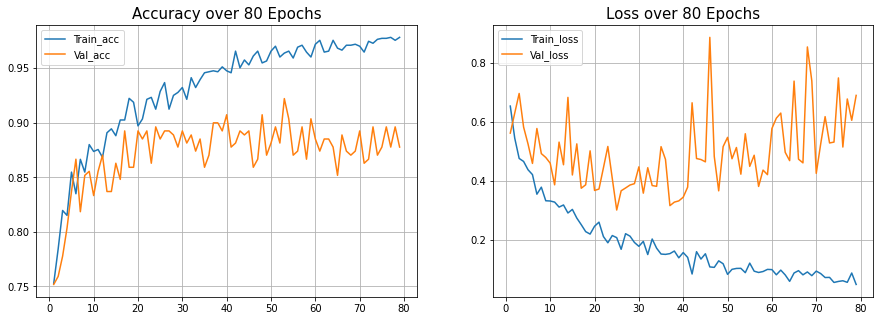

In [12]:
#Plot the accuracy and loss graphs

import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 80)

In [ ]:
#Save the trained model and copy to drive

model.save('4-class-Covid19-Mod-Xception.h5')
#!cp /content/"4-class-Covid19-Mod-Xception.h5" /content/drive/"My Drive"/"Colab Notebooks"


**Evaluate using evaluate Generator**

In [ ]:
# Create evaluate data generator from test set
#Dont forget shuffle false

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir =  '/content/COVID-19 Radiography Database'
eval_generator = test_datagen.flow_from_directory(test_dir,target_size=IMAGE_SIZE,batch_size=1, 
                                                  shuffle=False, seed=42, class_mode="categorical")
eval_generator.reset()    


Found 2905 images belonging to 4 classes.


In [ ]:
#Evalute the trained model on evaluate generator
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator)), 
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1,
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

#Poor test accuracy due to the small dataset size

**Create DataGen on single folder/class and predict !**

In [ ]:
IMAGE_SIZE    = (150, 150)
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir =  '/content/COVID-19 Radiography Database'
pred_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False,
        
        seed=42,
        
        class_mode="categorical")
pred_generator.reset()   

count=[0,0,0,0]

files=pred_generator.filenames

for i in range(len(files)):
  x,y = pred_generator.next()
  img = x
  predict=model.predict(img)
  
  p=np.argmax(predict, axis=-1)
  print(str(p[0])+" "+files[pred_generator.batch_index-1])
  #print(predict)
  #p=model.predict_classes(img)
  count[p[0]]+=1
  
#print(str(p[0])+" "+files[i]) 
print(count)
  


### **`Predict Results using predict generator and evaluate the accuracy and Confusion matrix `**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



filenames = eval_generator.filenames
nb_samples = len(filenames)
eval_generator.reset()  
predict = model.predict_generator(eval_generator,steps = np.ceil(len(eval_generator)))
pp=predict
predict=np.argmax(predict, axis=-1)
classes= eval_generator.classes[eval_generator.index_array]
acc=sum(predict==classes)/len(predict)
names=["covid","normal","pneumonia_bac","pneumonia_vir"]
#print(confusion_matrix(classes,predict))

font = {
'family': 'Times New Roman',
'size': 12
}
plt.rc('font', **font)
cm = confusion_matrix(classes, predict)
print(cm)
print(classification_report(classes,predict))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels \nAccuracy: {:0.2f}'.format(acc*100))
plt.ylabel("True labels")
plt.xticks(classes, [])
plt.yticks(classes, [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

**Test Single image**

[[1. 0. 0. 0.]]


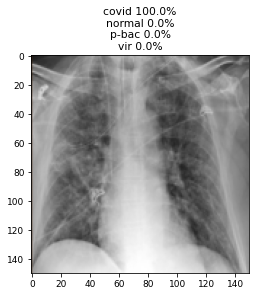

In [ ]:
import cv2
from skimage import transform

img_r = cv2.imread('/content/test/x.jpg')


img1 = np.array(img_r).astype('float32')/255
img2 = transform.resize(img1, (150, 150, 3))

img = np.expand_dims(img2, axis=0)

r=model.predict(img)

names= dict((v,k) for k,v in labels.items())
index = np.argmax(r)
name=names.get(index,"Unknown")

p=round(r.max()*100, 3)  #to find maximum score

scores=r
print(scores)

font = {
'family': 'Times New Roman',
'size': 9,

}
plt.rc('font', **font)

#plt.title(name +" ("+ str(p)+")")
plt.title(names[0] +" "+ str(round(scores[0][0]*100,1))+"%"+"\n"+names[1] +" "+ str(round(scores[0][1]*100,1))+"%"+"\n"+names[2] +" "+ str(round(scores[0][2]*100,1))+"%"+"\n"+names[3] +" "+ str(round(scores[0][3]*100,1))+"%")

plt.imshow(img2) 


**Test Whole Folder**

In [ ]:
import cv2
from skimage import transform

count=[0,0,0,0]
folder_name = "/content/drive/My Drive/Datasets/covid-19/covidnew/covid"
files=os.listdir(folder_name)
for i in range(len(files)):
  img_r = cv2.imread(folder_name+"/"+files[i])

  img = np.array(img_r).astype('float32')/255

  img = transform.resize(img, (150, 150, 3))
  img = np.expand_dims(img, axis=0)
  
  predict=model.predict(img)
  p=np.argmax(predict, axis=-1)
  #p=model.predict_classes(img)
  count[p[0]]+=1
  print(str(p[0])+" "+files[i]) 
  
  print()
  
  
print(count)